# Heart Attack Analysis & its Prediction
### - using Machine learning algorithm with PCA

###### Objective

With the dataset provided for heart analysis, we have to analyse the possibilities of heart attack under various factors/features, and then a prediction from the classification will tell us that if a person is prone to heart attack or not. Th detailed analysis can be proceed with the exploratory data analysis (EDA). The classification for predication can be done using various machine learning model algorithms, choose the best suited model for heart attack analysis and finally save the model in the pickle (.pkl) file.

###### About the dataset

Columns in the dataset are defined as :-

1. Age : Age of the patient

2. Sex : Sex of the patient (1 = male; 0 = female)

3. exng : exercise induced angina (1 = yes; 0 = no)

4. caa : number of major vessels (0-3) colored by flourosopy.

5. cp : Chest Pain type chest pain type

        Value 1: typical angina

        Value 2: atypical angina

        Value 3: non-anginal pain

        Value 4: asymptomatic

6. trtbps : resting blood pressure (in mm Hg)

7. chol : cholestoral in mg/dl fetched via BMI sensor

8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

9. restecg : resting electrocardiographic results

        Value 0: normal

        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

10. oldpeak : ST depression induced by exercise relative to rest. 

11. slp : the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) 

12. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect.

13. thalachh : maximum heart rate achieved

14. output : 

        0= less chance of heart attack 
        
        1= more chance of heart attack
        
###### Reference of the dataset

   1.  http://archive.ics.uci.edu/ml/datasets/Heart+Disease
   2.  https://www.ijrte.org/wp-content/uploads/papers/v8i2S3/B11630782S319.pdf
   3. https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


###### Project Data

The data was taken the kaggle dataset. We have been provided with the two dataset, that are -

1. heart.csv : Stored the details of the various parameters required heart analysis
2. o2Saturation.csv : Stored the details of the oxygen (o2) saturation level

###### THE STEPS TO BE FOLLOWED --

0. Any required installations
1. Data Sourcing and Understanding
2. Data Cleaning
3. Data Visualisation(EDA)
4. Data Preparation
5. Model Building 
6. Model Evaluation
7. Recommendations/Conclusion

REQUIRED INSTALLATION

In [1]:
#pip install pandas-profiling

In [2]:
#pip install plotly

##### DATA SOURCING AND UNDERSTANDING

In [3]:
#to avoid warnings
import warnings
warnings.filterwarnings('ignore')

#os
import os

#linear algebra libraries
import numpy as np, pandas as pd
import pandas_profiling as pp

#libraries for plotting graphs
import matplotlib.pyplot as plt, seaborn as sns, matplotlib
import plotly.express as px
import plotly.figure_factory as ff

#for model building
from sklearn.preprocessing import scale, StandardScaler
from sklearn import linear_model
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, mean_squared_error as MSE

In [4]:
#heart analysis dataset
heart_df = pd.read_csv("./data/heart.csv")
heart_df.head(4)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1

In [5]:
#o2 saturation level dataset
saturation = pd.read_csv("./data/o2Saturation.csv")
saturation.head(4)

98.6
0  98.6
1  98.6
2  98.6
3  98.1

In [6]:
#checking profile summary of heart attack dataset
pp.ProfileReport(heart_df)

In [7]:
#getting all types of info from dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#checking for null values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
#decribing columns
heart_df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Hence dataset has zero null/missing values, we have given cleaned dataset!!

In [10]:
#separating categorical columns
cat_heart = heart_df[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']]

#separating continuous columns
conti_heart = heart_df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]

In [11]:
#decribing continuous columns
conti_heart.describe()

age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

In [12]:
#value counts for the categorical columns

sex_count = heart_df['sex'].value_counts()
cp_count = heart_df['cp'].value_counts()
fbs_count = heart_df['fbs'].value_counts()
restecg_count = heart_df['restecg'].value_counts()
slp_count = heart_df['slp'].value_counts()
exng_count = heart_df['exng'].value_counts()
caa_count = heart_df['caa'].value_counts()
thall_count = heart_df['thall'].value_counts()

#printing all the values
print("sex_count :\n", sex_count)
print("cp_count :\n", cp_count)
print("fbs_count :\n", fbs_count)
print("restecg_count :\n", restecg_count)
print("slp_count :\n", slp_count)
print("exng_count :\n", exng_count)
print("caa_count :\n", caa_count)
print("thall_count :\n", thall_count)

sex_count :
 1    207
0     96
Name: sex, dtype: int64
cp_count :
 0    143
2     87
1     50
3     23
Name: cp, dtype: int64
fbs_count :
 0    258
1     45
Name: fbs, dtype: int64
restecg_count :
 1    152
0    147
2      4
Name: restecg, dtype: int64
slp_count :
 2    142
1    140
0     21
Name: slp, dtype: int64
exng_count :
 0    204
1     99
Name: exng, dtype: int64
caa_count :
 0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
thall_count :
 2    166
3    117
1     18
0      2
Name: thall, dtype: int64


###### DATA VISUALISATION (EDA)

###### Univariate Analysis

In [13]:
def distplot_check(column):
    plt.title('Checking Outliers with distplot()')
    sns.distplot(column, bins=10)
    plt.show()

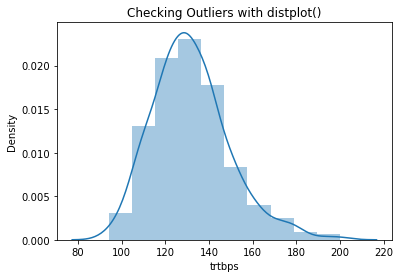

In [14]:
#resting blood pressure (in mm Hg)
distplot_check(heart_df['trtbps'])

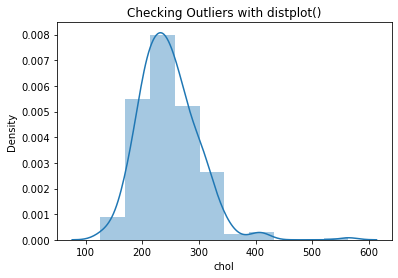

In [15]:
#cholestoral in mg/dl fetched via BMI sensor
distplot_check(heart_df['chol'])

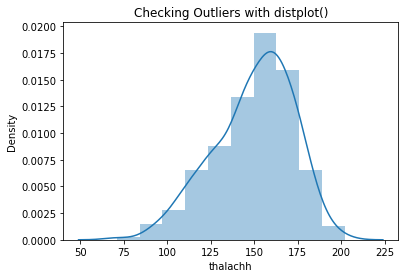

In [16]:
#maximum heart rate achieved
distplot_check(heart_df['thalachh'])

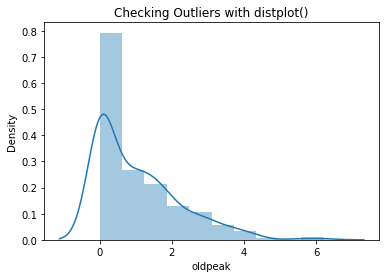

In [17]:
#ST depression induced by exercise relative to rest
distplot_check(heart_df['oldpeak'])

These features are normally distributed!!

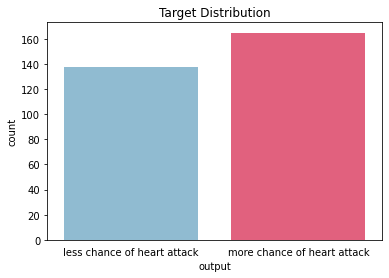

In [18]:
#analysis of the output variable : how much chance of heart attack
ax = sns.countplot(data = heart_df,  x = 'output', palette = ['#85bfdc','#f64c72'])
ax.set(xticklabels = ['less chance of heart attack', 'more chance of heart attack'], title = "Target Distribution")
ax.tick_params(bottom = False)

In [19]:
#analysis of the age variable : which age has the chance of heart attack
fig = px.histogram(heart_df, x="age", color="output", marginal="box", 
                   hover_data = heart_df.columns, color_discrete_sequence=['#f64c72','#85bfdc'])

#layout
fig.update_layout(
    title = "Heart attack chance corresponding to age"
)

#plot
fig.show()

#index
print("*1 : high chance of heart attack\n*0 : low chance of heart attack")

*1 : high chance of heart attack
*0 : low chance of heart attack


Output if --
*1 : high chance of heart attack
*0 : low chance of heart attack


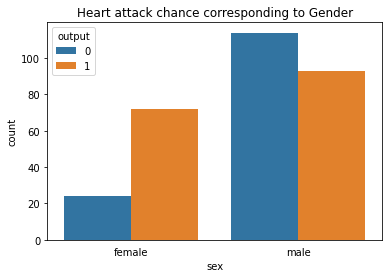

In [20]:
#analysis of the sex variable : which sex has the chance of heart attack
ax = sns.countplot(data = heart_df, x = 'sex', hue = 'output')
ax.set(xticklabels = ['female', 'male'], title = "Heart attack chance corresponding to Gender")
ax.tick_params(bottom = False)

#index
print("Output if --\n*1 : high chance of heart attack\n*0 : low chance of heart attack")

###### Bivariate Analysis

In [21]:
def bivariate(column):
    
    #if 1 : high chance of heart attack
    high = heart_df[heart_df['output']==1][column]
    #else 0 : low chance of heart attack
    low = heart_df[heart_df['output']==0][column]
    
    #plotting
    fig = ff.create_distplot([high, low],
                             ['more chance of heart attack', 'less chance of heart attack'], 
                             show_hist=False, colors=['#f64c72', '#85bfdc'])
    
    #getting layout
    fig.update_layout(
        title = "Heart Attack chance corresponding to " + column,
        xaxis_title = 'Feature Variable : ' + column,
    )

    #show plot
    fig.show()

OUTPUT VS TRTBPS

In [22]:
print("Analysis of trtbps variable : how blood pressure is related to the chance of heart attack")
bivariate('trtbps')

Analysis of trtbps variable : how blood pressure is related to the chance of heart attack


OUTPUT VS CHOL

In [23]:
print("Analysis of chol variable : how cholestoral is related to the chance of heart attack")
bivariate('chol')

Analysis of chol variable : how cholestoral is related to the chance of heart attack


In [24]:
print("Analysis of thalachh variable : how maximum heart rate achieved is related to the chance of heart attack")
bivariate('thalachh')

Analysis of thalachh variable : how maximum heart rate achieved is related to the chance of heart attack


In [25]:
print("Analysis of oldepeak variable : how ST depression induced by exercise relative to rest is related to the chance of heart attack")
bivariate('oldpeak')

Analysis of oldepeak variable : how ST depression induced by exercise relative to rest is related to the chance of heart attack


###### Heatmap

CONTINUOUS VARIABLES

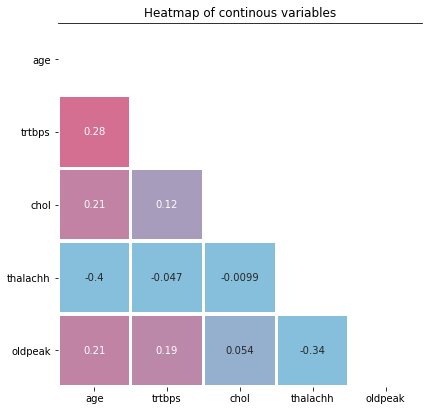

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
df_cor = conti_heart.corr()

half = np.triu(np.ones_like(df_cor, dtype=np.bool))

my_colors = ['#85bfdc','#f64c72']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', my_colors)

heatmap = sns.heatmap(df_cor, 
            square=True, 
            mask=half,
            linewidth=2.5, 
            vmax=0.4, vmin=0, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

heatmap.set(title="Heatmap of continous variables")
heatmap.set_yticklabels(heatmap.get_xticklabels(), rotation = 0)
heatmap.spines['top'].set_visible(True)

plt.tight_layout()

CATEGORICAL VARIABLES

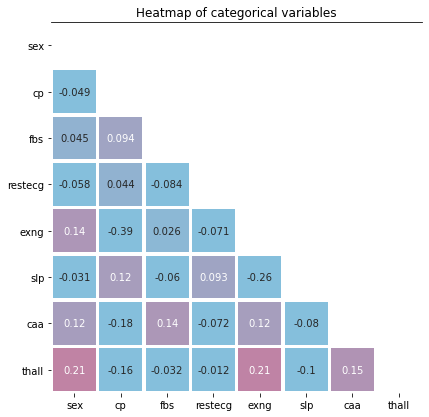

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
df_cor = cat_heart.corr()

half = np.triu(np.ones_like(df_cor, dtype=np.bool))

my_colors = ['#85bfdc','#f64c72']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', my_colors)

heatmap = sns.heatmap(df_cor, 
            square=True, 
            mask=half,
            linewidth=2.5, 
            vmax=0.4, vmin=0, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

heatmap.set(title="Heatmap of categorical variables")
heatmap.set_yticklabels(heatmap.get_xticklabels(), rotation = 0)
heatmap.spines['top'].set_visible(True)

plt.tight_layout()

HEART ANALYSIS VIA HEATMAP

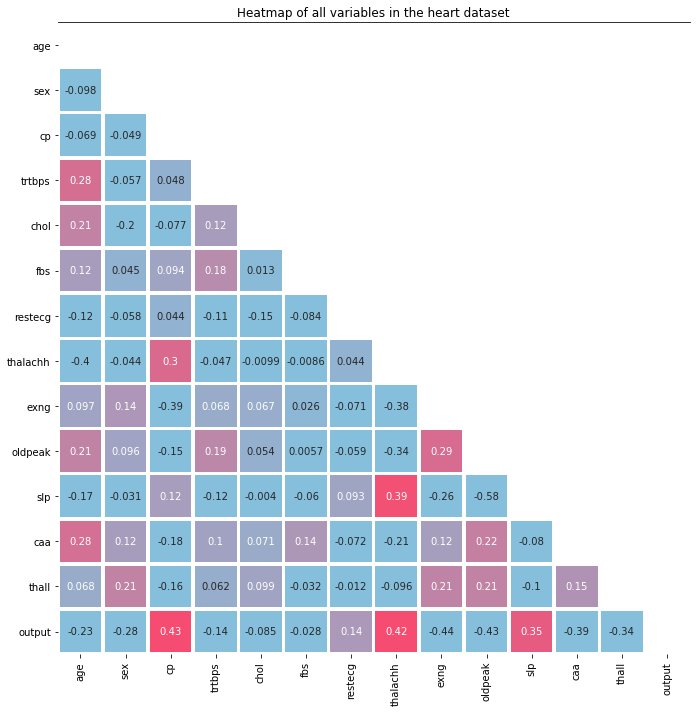

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
df_cor = heart_df.corr()

half = np.triu(np.ones_like(df_cor, dtype=np.bool))

my_colors = ['#85bfdc','#f64c72']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', my_colors)

heatmap = sns.heatmap(df_cor, 
            square=True, 
            mask=half,
            linewidth=2.5, 
            vmax=0.4, vmin=0, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

heatmap.set(title="Heatmap of all variables in the heart dataset")
heatmap.set_yticklabels(heatmap.get_xticklabels(), rotation = 0)
heatmap.spines['top'].set_visible(True)

plt.tight_layout()

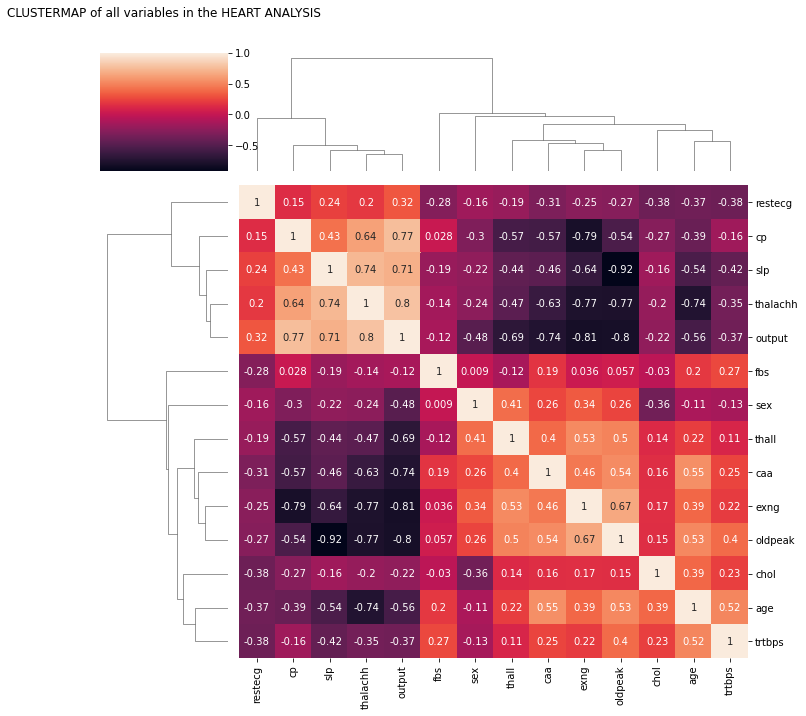

In [29]:
#correlation matrix more clearly among the variables
cluster_map = sns.clustermap(df_cor.corr(), annot=True)

plt.title("CLUSTERMAP of all variables in the HEART ANALYSIS\n\n")
plt.tight_layout()

###### Multivariate Analysis

thalachh VS chol VS cp VS sex VS output

In [30]:
#thalachh vs chol vs cp vs sex WITH RESPECT TO output
fig = px.scatter(heart_df,
    x='thalachh',
    y= 'chol',
    color='output',
    facet_col='cp', 
    facet_row='sex',
    color_discrete_sequence=['#f64c72','#85bfdc'], 
)

fig.show()

thalachh VS chol VS restecg VS sex VS output

In [31]:
#thalachh vs chol vs restecg vs sex WITH RESPECT TO output
fig = px.scatter(heart_df,
    x='thalachh',
    y= 'chol',
    color='output',
    facet_col='restecg', 
    facet_row='sex',
    color_discrete_sequence=['#f64c72','#85bfdc'], 
)

fig.show()

thalachh VS chol VS caa VS sex VS output

In [32]:
#thalachh vs chol vs ca vs sex WITH RESPECT TO output
fig = px.scatter(heart_df,
    x='thalachh',
    y= 'chol',
    color='output',
    facet_col='caa', 
    facet_row='sex',
    color_discrete_sequence=['#f64c72','#85bfdc'], 
)

fig.show()

thalachh VS chol VS exang VS sex VS output

In [33]:
#thalachh vs chol vs exng vs sex WITH RESPECT TO output
fig = px.scatter(heart_df,
    x='thalachh',
    y= 'chol',
    color='output',
    facet_col='exng', 
    facet_row='sex',
    color_discrete_sequence=['#f64c72','#85bfdc'], 
)

fig.show()

thalachh VS chol VS fbs VS sex VS output

In [34]:
#thalachh vs chol vs fbs vs sex WITH RESPECT TO output
fig = px.scatter(heart_df,
    x='thalachh',
    y= 'chol',
    color='output',
    facet_col='fbs', 
    facet_row='sex',
    color_discrete_sequence=['#f64c72','#85bfdc'], 
)

fig.show()

###### DATA PREPARATION

In [35]:
#mapping the categorical columns
heart_df['cp'] = heart_df['cp'].map({0:'asymptomatic', 1:'atypical angina', 2:'non-anginal pain' , 3:'typical angina'})
heart_df['restecg'] = heart_df['restecg'].map({0:'left ventricular hypertrophy', 1:'normal', 2:'ST-T wave abnormality'})
heart_df['thall'] = heart_df['thall'].map({1:'fixed defect', 2:'normal', 3:'reversable defect', 0:'nothing'})

In [36]:
heart_df.head(3)

age  sex                cp  trtbps  chol  fbs  \
0   63    1    typical angina     145   233    1   
1   37    1  non-anginal pain     130   250    0   
2   41    0   atypical angina     130   204    0   

                        restecg  thalachh  exng  oldpeak  slp  caa  \
0  left ventricular hypertrophy       150     0      2.3    0    0   
1                        normal       187     0      3.5    0    0   
2  left ventricular hypertrophy       172     0      1.4    2    0   

          thall  output  
0  fixed defect       1  
1        normal       1  
2        normal       1

In [37]:
#getting dummy variables
heart_data = pd.get_dummies(heart_df, drop_first=False)
heart_data.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'output', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal pain', 'cp_typical angina',
       'restecg_ST-T wave abnormality', 'restecg_left ventricular hypertrophy',
       'restecg_normal', 'thall_fixed defect', 'thall_normal', 'thall_nothing',
       'thall_reversable defect'],
      dtype='object')

Since one hot encoding dropped "thall_fixed defect" column which was a useful column compared to 'thall_nothing' which is a null column, we dropped 'thall_nothing' and concatinated 'thall_fixed defect'.

In [38]:
#store the required column
temp_df = heart_data['thall_fixed defect']

In [39]:
#getting dummy variables
heart_data = pd.get_dummies(heart_df, drop_first=True)
heart_data.head(4)

age  sex  trtbps  chol  fbs  thalachh  exng  oldpeak  slp  caa  output  \
0   63    1     145   233    1       150     0      2.3    0    0       1   
1   37    1     130   250    0       187     0      3.5    0    0       1   
2   41    0     130   204    0       172     0      1.4    2    0       1   
3   56    1     120   236    0       178     0      0.8    2    0       1   

   cp_atypical angina  cp_non-anginal pain  cp_typical angina  \
0                   0                    0                  1   
1                   0                    1                  0   
2                   1                    0                  0   
3                   1                    0                  0   

   restecg_left ventricular hypertrophy  restecg_normal  thall_normal  \
0                                     1               0             0   
1                                     0               1             1   
2                                     1               0             1   
3                                     0               1             1   

   thall_nothing  thall_reversable defect  
0              0                        0  
1              0                        0  
2              0                        0  
3              0                        0

In [40]:
#checking the thall_nothing value_counts
heart_data['thall_nothing'].value_counts()

0    301
1      2
Name: thall_nothing, dtype: int64

This shows that it is almost null values!!! Getting the useful column thall_fixed  defect.

In [41]:
#merge the two dataframe
merge_df = [heart_data, temp_df]

#concatenate the data
heart_final = pd.concat(merge_df, axis=1)

#drop the null column
heart_final.drop('thall_nothing', axis=1, inplace=True)

#dataframe
heart_final.head()

age  sex  trtbps  chol  fbs  thalachh  exng  oldpeak  slp  caa  output  \
0   63    1     145   233    1       150     0      2.3    0    0       1   
1   37    1     130   250    0       187     0      3.5    0    0       1   
2   41    0     130   204    0       172     0      1.4    2    0       1   
3   56    1     120   236    0       178     0      0.8    2    0       1   
4   57    0     120   354    0       163     1      0.6    2    0       1   

   cp_atypical angina  cp_non-anginal pain  cp_typical angina  \
0                   0                    0                  1   
1                   0                    1                  0   
2                   1                    0                  0   
3                   1                    0                  0   
4                   0                    0                  0   

   restecg_left ventricular hypertrophy  restecg_normal  thall_normal  \
0                                     1               0             0   
1                                     0               1             1   
2                                     1               0             1   
3                                     0               1             1   
4                                     0               1             1   

   thall_reversable defect  thall_fixed defect  
0                        0                   1  
1                        0                   0  
2                        0                   0  
3                        0                   0  
4                        0                   0

In [42]:
#checking columns
heart_final.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'output', 'cp_atypical angina', 'cp_non-anginal pain',
       'cp_typical angina', 'restecg_left ventricular hypertrophy',
       'restecg_normal', 'thall_normal', 'thall_reversable defect',
       'thall_fixed defect'],
      dtype='object')

In [43]:
#shape of the dataset
heart_final.shape

(303, 19)

###### MODEL BUILDING

###### Feature Engineering

In [44]:
X = heart_final.drop('output', axis = 1)
y = heart_final['output']

In [45]:
X.head(4)

age  sex  trtbps  chol  fbs  thalachh  exng  oldpeak  slp  caa  \
0   63    1     145   233    1       150     0      2.3    0    0   
1   37    1     130   250    0       187     0      3.5    0    0   
2   41    0     130   204    0       172     0      1.4    2    0   
3   56    1     120   236    0       178     0      0.8    2    0   

   cp_atypical angina  cp_non-anginal pain  cp_typical angina  \
0                   0                    0                  1   
1                   0                    1                  0   
2                   1                    0                  0   
3                   1                    0                  0   

   restecg_left ventricular hypertrophy  restecg_normal  thall_normal  \
0                                     1               0             0   
1                                     0               1             1   
2                                     1               0             1   
3                                     0               1             1   

   thall_reversable defect  thall_fixed defect  
0                        0                   1  
1                        0                   0  
2                        0                   0  
3                        0                   0

In [46]:
y.head(4)

0    1
1    1
2    1
3    1
Name: output, dtype: int64

In [47]:
X.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'cp_atypical angina', 'cp_non-anginal pain',
       'cp_typical angina', 'restecg_left ventricular hypertrophy',
       'restecg_normal', 'thall_normal', 'thall_reversable defect',
       'thall_fixed defect'],
      dtype='object')

###### Train-Test Split

In [48]:
#80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
#normalize the X variable data
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train)).values
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test)).values

In [50]:
#shape of train sets
print(X_train.shape)
print(y_train.shape)

#shape of test sets
print(X_test.shape)
print(y_test.shape)

(242, 18)
(242,)
(61, 18)
(61,)


In [51]:
#y_train
print("y_train :")
print("counts of label 1")
train_label1 = sum(y_train==1)
print(train_label1)

print("counts of label 0")
train_label0 = sum(y_train==0)
print(train_label0)

y_train :
counts of label 1
131
counts of label 0
111


In [52]:
#y_test
print("y_test :")
print("counts of label 1")
test_label1 = sum(y_test==1)
print(test_label1)

print("counts of label 0")
test_label0 = sum(y_test==0)
print(test_label0)

y_test :
counts of label 1
34
counts of label 0
27


##### Principal Component Analysis (PCA)

PIPELINE CREATION

In [53]:
#create pipeline
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

#fitting pca
pca.fit(X_train)
heart_pca = pca.fit_transform(X_train)

In [54]:
#pca model extraction
pca = pca.named_steps['pca']
pca

PCA()

In [55]:
#explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      19.55
1      31.36
2      40.06
3      47.67
4      54.67
5      61.13
6      67.51
7      72.67
8      77.39
9      82.01
10     86.30
11     90.29
12     93.56
13     95.96
14     97.99
15     99.75
16     99.92
17    100.00
dtype: float64


Here, we can say that,
    
    1. 4 : 99% variance
    2. 14 : 95% variance

###### Logistic Regression with RFE

In [56]:
#First Training Model

#Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                  242
Model:                            GLM   Df Residuals:                      223
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -81.170
Date:                Tue, 27 Apr 2021   Deviance:                       162.34
Time:                        19:19:32   Pearson chi2:                     224.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.2549      3.456     -0.363      0.717      -8.028       5.519
age                                     -0.1407      1.271     -0.111      0.912      -2.633       2.351
sex                                     -1.7238      0.577     -2.987      0.003      -2.855      -0.593
trtbps                                  -0.9373      1.158     -0.809      0.418      -3.208       1.333
chol                                    -2.6251      1.818     -1.444      0.149      -6.188       0.938
fbs                                     -0.2585      0.614     -0.421      0.674      -1.463       0.945
thalachh                                 2.7483      1.584      1.736      0.083      -0.355       5.852
exng                                    -0.8075      0.480     -1.682      0.093      -1.748       0.134
oldpeak                                 -2.9494      1.596     -1.849      0.065      -6.077       0.178
slp                                      0.2910      0.856      0.340      0.734      -1.386       1.968
caa                                     -3.8603      0.914     -4.222      0.000      -5.653      -2.068
cp_atypical angina                       0.9568      0.649      1.475      0.140      -0.315       2.228
cp_non-anginal pain                      1.9060      0.534      3.572      0.000       0.860       2.952
cp_typical angina                        1.7286      0.711      2.431      0.015       0.335       3.122
restecg_left ventricular hypertrophy     1.0756      2.342      0.459      0.646      -3.515       5.667
restecg_normal                           1.3969      2.338      0.598      0.550      -3.185       5.978
thall_normal                             1.8641      2.274      0.820      0.412      -2.593       6.321
thall_reversable defect                  0.4850      2.286      0.212      0.832      -3.996       4.966
thall_fixed defect                       1.5847      2.383      0.665      0.506      -3.085       6.254
========================================================================================================
"""

In [57]:
#Feature Selection Using RFE
logreg = LogisticRegression()

#running RFE with 12 variables
rfe = RFE(logreg, 12)

#fit rfe
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=12)

In [58]:
#rfe support variables
rfe.support_

array([False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False])

In [59]:
#listing support an ranking together
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 3),
 ('sex', True, 1),
 ('trtbps', True, 1),
 ('chol', True, 1),
 ('fbs', False, 5),
 ('thalachh', True, 1),
 ('exng', True, 1),
 ('oldpeak', True, 1),
 ('slp', False, 2),
 ('caa', True, 1),
 ('cp_atypical angina', True, 1),
 ('cp_non-anginal pain', True, 1),
 ('cp_typical angina', True, 1),
 ('restecg_left ventricular hypertrophy', False, 6),
 ('restecg_normal', False, 4),
 ('thall_normal', True, 1),
 ('thall_reversable defect', True, 1),
 ('thall_fixed defect', False, 7)]

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['sex', 'trtbps', 'chol', 'thalachh', 'exng', 'oldpeak', 'caa',
       'cp_atypical angina', 'cp_non-anginal pain', 'cp_typical angina',
       'thall_normal', 'thall_reversable defect'],
      dtype='object')

In [61]:
#columns not supported by rfe
X_train.columns[~rfe.support_]

Index(['age', 'fbs', 'slp', 'restecg_left ventricular hypertrophy',
       'restecg_normal', 'thall_fixed defect'],
      dtype='object')

In [62]:
#model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                  242
Model:                            GLM   Df Residuals:                      229
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -82.105
Date:                Tue, 27 Apr 2021   Deviance:                       164.21
Time:                        19:19:32   Pearson chi2:                     221.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3055      1.347      0.969      0.332      -1.334       3.945
sex                        -1.6614      0.554     -2.999      0.003      -2.747      -0.576
trtbps                     -1.1409      1.094     -1.042      0.297      -3.286       1.004
chol                       -2.7966      1.739     -1.608      0.108      -6.205       0.612
thalachh                    3.0139      1.422      2.120      0.034       0.228       5.800
exng                       -0.8408      0.473     -1.777      0.076      -1.768       0.087
oldpeak                    -3.0951      1.351     -2.290      0.022      -5.744      -0.447
caa                        -3.7656      0.876     -4.300      0.000      -5.482      -2.049
cp_atypical angina          0.9131      0.641      1.424      0.155      -0.344       2.170
cp_non-anginal pain         1.7959      0.515      3.485      0.000       0.786       2.806
cp_typical angina           1.6324      0.685      2.383      0.017       0.290       2.975
thall_normal                0.6066      0.823      0.737      0.461      -1.007       2.220
thall_reversable defect    -0.7469      0.806     -0.927      0.354      -2.326       0.832
===========================================================================================
"""

In [63]:
#predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

74     0.992719
153    0.955863
64     0.959183
296    0.857070
287    0.733256
286    0.680781
236    0.105523
126    0.764267
73     0.663849
20     0.395487
dtype: float64

In [64]:
#getting predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99271891, 0.95586271, 0.95918338, 0.85706989, 0.73325608,
       0.68078135, 0.10552334, 0.76426746, 0.66384931, 0.39548734])

CORRELATION MATRIX

<AxesSubplot:>

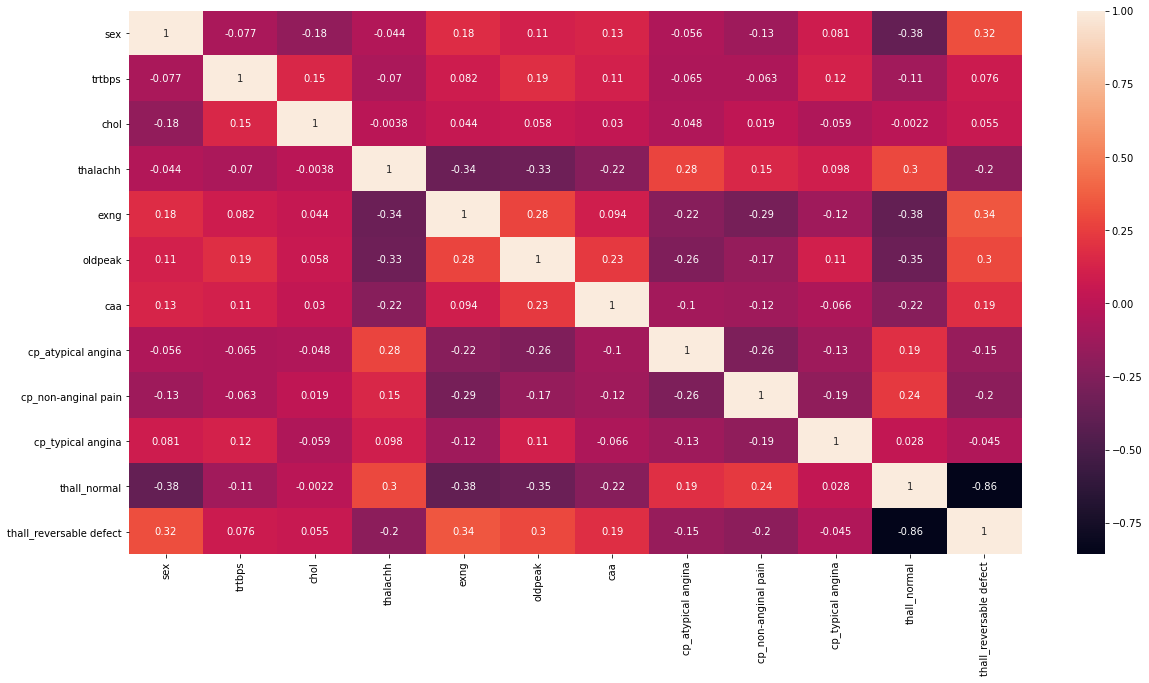

In [65]:
#figure size
plt.figure(figsize = (20,10))

#heatmap for train data
sns.heatmap(X_train[col].corr(),annot = True)

<AxesSubplot:>

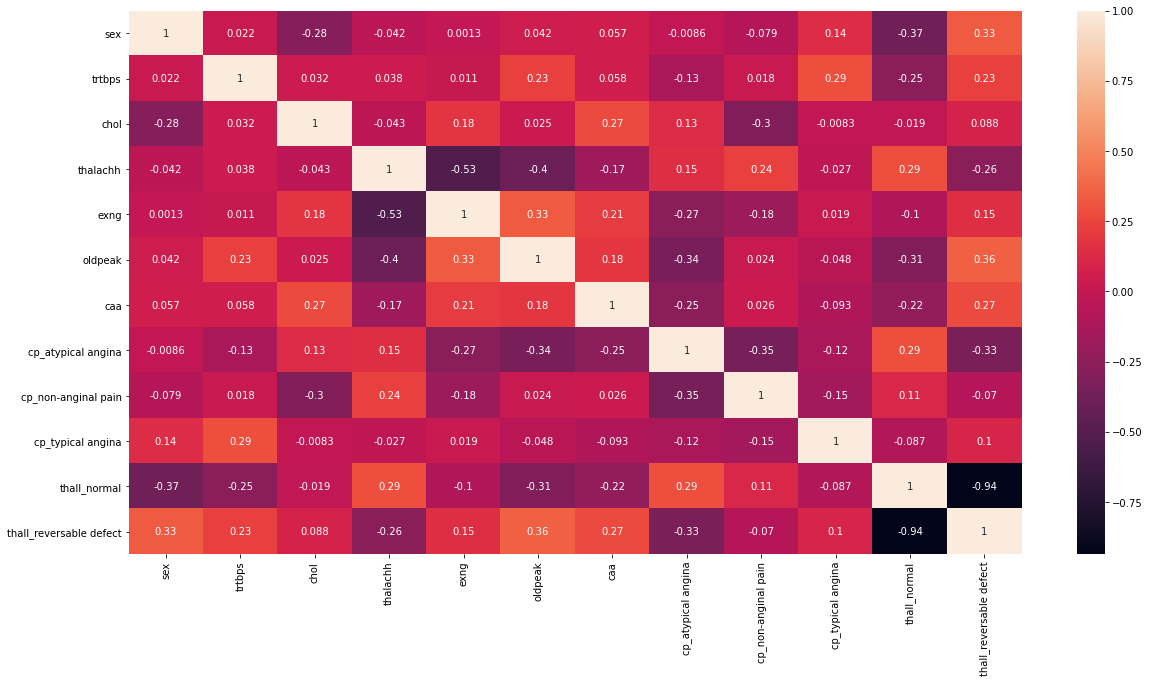

In [66]:
#figure size
plt.figure(figsize = (20,10))

#heatmap for test data
sns.heatmap(X_test[col].corr(),annot = True)

###### Logistic Regression with PCA

In [67]:
#creating PCA class
pca = PCA(svd_solver='randomized', random_state=42)

In [68]:
#pca fitting on train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [69]:
#getting pca components
pc = pca.components_
pc

array([[ 3.77370284e-02,  3.00640688e-01,  3.41625739e-02,
         5.69199964e-03,  3.99151076e-02, -8.35311668e-02,
         3.59389214e-01,  1.08347992e-01, -1.52039361e-01,
         9.25486786e-02, -1.13179112e-01, -2.19127122e-01,
         3.91415552e-03,  2.03360787e-01, -2.04351418e-01,
        -5.64990266e-01,  5.09632792e-01,  5.42549463e-02],
       [ 2.42045327e-02, -8.54869796e-02,  3.66726106e-02,
         2.34638182e-02,  7.15095701e-02,  9.98369131e-03,
        -9.74470548e-02, -6.78175806e-03, -2.04325806e-02,
         5.49514929e-03, -3.02075800e-02,  7.17132854e-02,
         1.74351677e-02,  6.67447973e-01, -6.68632363e-01,
         1.82480987e-01, -2.05578483e-01,  2.30358553e-02],
       [ 2.95969029e-04,  1.44187492e-01, -1.54125675e-02,
         1.08717401e-03,  5.72003381e-02,  2.31767837e-02,
        -3.11858636e-01, -1.48669048e-02,  6.40445895e-02,
         7.87157179e-03, -3.49090324e-01,  8.10678862e-01,
        -7.38467636e-02,  1.16382102e-03,  1.01998790e

In [70]:
#listing all the columns of X_train together
col_names = list(X_train.columns)

#finding top 10 pca components
pca_features = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],
                             'PC6':pc[5],'PC7':pc[6],'PC8':pc[7],'PC9':pc[8],'PC10':pc[9], 
                            'Features':col_names})

pca_features.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.037737  0.024205  0.000296  0.105319 -0.040921  0.129021 -0.062184   
1  0.300641 -0.085487  0.144187 -0.691257  0.589931 -0.060092  0.003293   
2  0.034163  0.036673 -0.015413  0.057626 -0.034246  0.102450 -0.013370   
3  0.005692  0.023464  0.001087  0.054428 -0.045761 -0.005089  0.018498   
4  0.039915  0.071510  0.057200  0.039222  0.077455  0.779294  0.518099   
5 -0.083531  0.009984  0.023177 -0.134890 -0.056268 -0.068963  0.094930   
6  0.359389 -0.097447 -0.311859  0.507372  0.487922 -0.260403  0.351165   
7  0.108348 -0.006782 -0.014867  0.104163  0.030576  0.090211 -0.225653   
8 -0.152039 -0.020433  0.064045 -0.200840 -0.068601 -0.265616  0.354684   
9  0.092549  0.005495  0.007872  0.003722 -0.000056  0.146491 -0.031635   

        PC8       PC9      PC10  Features  
0  0.007659  0.105057 -0.239125       age  
1 -0.001701 -0.117642 -0.120785       sex  
2 -0.046403  0.035876 -0.023469    trtbps  
3 -0.022466  0.007202 -0.039435      chol  
4 -0.240740 -0.088833  0.001386       fbs  
5 -0.104582 -0.018356  0.168213  thalachh  
6 -0.054568 -0.036773  0.097632      exng  
7  0.099748 -0.186700 -0.134823   oldpeak  
8 -0.387904  0.641934  0.087442       slp  
9  0.067842  0.327399 -0.743133       caa

###### Cummulative Explained Variance

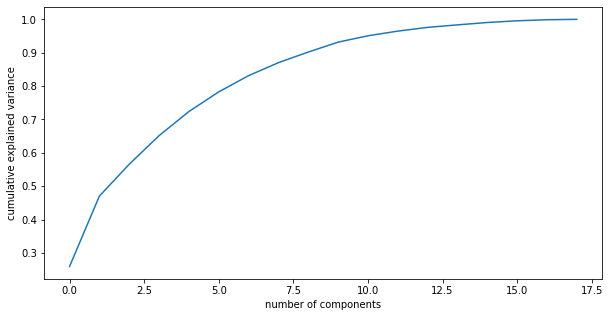

In [71]:
%matplotlib inline
fig = plt.figure(figsize=(10,5))

cum_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_sum)

#labels
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [72]:
#creating pipeline
PCA_VARS = 18
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [73]:
#train data

#fit pipeline model
pipeline.fit(X_train, y_train)

#checking score on train data
pipeline.score(X_train, y_train)

0.8553719008264463

###### Test Data Evaluation

In [74]:
#churn prediction on test data
y_pred = pipeline.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

#Let's see the sensitivity
print('\nSensitivity: ', TP / float(TP+FN))

#Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

#area under curve (AUC)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("\n AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[24  3]
 [ 7 27]]

Sensitivity:  0.7941176470588235
Specificity:  0.8888888888888888

 AUC:  0.92


###### Hyperparameter tuning

In [75]:
#identifying class imbalance
y_train.value_counts()/y_train.shape

1    0.541322
0    0.458678
Name: output, dtype: float64

In [76]:
#pca = PCA()

#logistic Regression with class_weight parameter
logistic = LogisticRegression(class_weight='balanced')

#creating pipeline
steps = [("scaler", StandardScaler()), ("pca", pca),("logistic", logistic)]

#pipeline
pca_logistic = Pipeline(steps)

#hyperparameter
params = {'pca__n_components': [14, 4], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

#create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [77]:
#fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 145 out of 160 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca',
                                        PCA(random_state=42,
                                            svd_solver='randomized')),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [14, 4]},
             scoring='roc_auc', verbose=1)

In [78]:
#print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8960738938999808
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 14}


In [79]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.030008  7.664467e-03         0.000000        0.000000   
1        0.024888  1.478699e-02         0.000000        0.000000   
2        0.015631  0.000000e+00         0.009373        0.007653   
3        0.015626  3.024817e-06         0.003124        0.006248   
4        0.015625  5.722046e-07         0.000000        0.000000   
5        0.012499  6.249619e-03         0.000000        0.000000   
6        0.023974  7.357968e-03         0.001304        0.002608   
7        0.010167  7.791733e-03         0.003125        0.006250   
8        0.006250  7.655006e-03         0.000000        0.000000   
9        0.012505  6.252290e-03         0.000000        0.000000   
10       0.018752  6.254776e-03         0.000000        0.000000   
11       0.016927  2.611456e-03         0.003126        0.006253   
12       0.016934  2.608013e-03         0.000000        0.000000   
13       0.005734  5.743782e-03         0.000000        0.000000   
14       0.013808  7.351176e-03         0.009381        0.007660   
15       0.016936  2.605873e-03         0.003124        0.006248   
16       0.009381  7.659523e-03         0.000000        0.000000   
17       0.009376  7.655864e-03         0.000000        0.000000   
18       0.018753  6.247307e-03         0.003124        0.006249   
19       0.015111  8.098297e-03         0.003126        0.006251   
20       0.015633  1.220871e-05         0.000000        0.000000   
21       0.015239  4.768943e-03         0.000000        0.000000   
22       0.014233  4.912846e-03         0.007485        0.007028   
23       0.015854  8.505200e-03         0.008855        0.006100   
24       0.013699  8.556432e-03         0.000000        0.000000   
25       0.011764  6.053304e-03         0.000000        0.000000   
26       0.018474  2.841650e-03         0.008654        0.006137   
27       0.021645  8.014012e-03         0.006725        0.005023   
28       0.014141  1.943435e-03         0.000000        0.000000   
29       0.011201  1.469296e-03         0.000000        0.000000   
30       0.021596  6.650631e-03         0.004804        0.000979   
31       0.014397  1.495150e-03         0.004200        0.000750   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      14   
1                0.1                      l1                       4   
2                0.1                      l2                      14   
3                0.1                      l2                       4   
4                0.5                      l1                      14   
5                0.5                      l1                       4   
6                0.5                      l2                      14   
7                0.5                      l2                       4   
8                  1                      l1                      14   
9                  1                      l1                       4   
10                 1                      l2                      14   
11                 1                      l2                       4   
12                 2                      l1                      14   
13                 2                      l1                       4   
14                 2                      l2                      14   
15                 2                      l2                       4   
16                 3                      l1                      14   
17                 3                      l1                       4   
18                 3                      l2                      14   
19                 3                      l2                       4   
20                 4                      l1                      14   
21                 4                      l1                       4   
22                 4                      l2                      14   
23                 4           

In [80]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

#Let's see the sensitivity
print('\nSensitivity: ', TP / float(TP+FN))

#Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("\nAUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[24  3]
 [ 7 27]]

Sensitivity:  0.7941176470588235
Specificity:  0.8888888888888888

AUC:  0.92


###### RANDOM FOREST with PCA

In [81]:
# random forest classifier
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

#hyperparameter
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

#create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [82]:
#best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8850249991554339
Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}


In [83]:
#churn prediction on test data
y_pred = model.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

#sensitivity
print('\nSensitivity: ', TP / float(TP+FN))

#specificity
print('Specificity: ',TN / float(TN+FP))

#area under curve (AUC)
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("\nAUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[24  3]
 [ 5 29]]

Sensitivity:  0.8529411764705882
Specificity:  0.8888888888888888

AUC:  0.9


###### Hyperparameter Tuning

In [84]:
#specify number of folds for k-fold CV
n_folds = 5

#parameters
parameters = {'max_depth': range(2, 20, 5)}

#random forest classifier
rf_hyper = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_hyper = GridSearchCV(rf_hyper, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy", n_jobs=-1)

#fit rf model
rf_hyper.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [85]:
#GridSearch CV scores
scores = rf_hyper.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.488651      0.029189         0.028284        0.009752   
1       0.400992      0.139745         0.018727        0.007386   
2       0.237380      0.004347         0.018191        0.004045   
3       0.194481      0.021279         0.012147        0.004019   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.734694           0.816327   
1               7   {'max_depth': 7}           0.734694           0.816327   
2              12  {'max_depth': 12}           0.714286           0.775510   
3              17  {'max_depth': 17}           0.734694           0.734694   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.833333           0.875000  ...         0.810204        0.046511   
1           0.854167           0.895833  ...         0.822704        0.053345   
2           0.854167           0.895833  ...         0.802126        0.064642   
3           0.854167           0.895833  ...         0.810544        0.065120   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.834197            0.865285   
1                1            0.994819            0.994819   
2                4            1.000000            1.000000   
3                2            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.824742            0.829897            0.835052   
1            1.000000            0.989691            0.989691   
2            1.000000            1.000000            1.000000   
3            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          0.837835         0.014205  
1          0.993804         0.003855  
2          1.000000         0.000000  
3          1.000000         0.000000  

[4 rows x 21 columns]

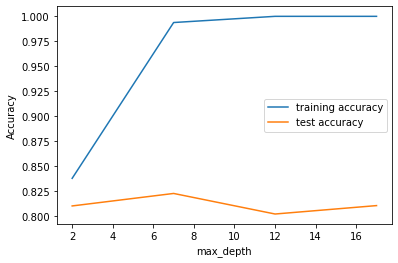

In [86]:
#plot accuracies with min_samples_split
plt.figure()

#training accuracy
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")

#test accuracy
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")

#labels
plt.xlabel("max_depth")
plt.ylabel("Accuracy")


plt.legend()
plt.show()

In [87]:
#specify number of folds for k-fold CV
n_folds = 5

#min_samples_leaf parameter
parameters = {'min_samples_leaf': range(100, 400, 50)}

#random forest classifier
rf_hyper = RandomForestClassifier(class_weight='balanced')


#fit tree on training data
rf_hyper = GridSearchCV(rf_hyper, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy", n_jobs=-1)

rf_hyper.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [88]:
#GridSearch CV scores
scores = rf_hyper.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.336428      0.017072         0.039578        0.005802   
1       0.398726      0.042546         0.036711        0.007162   
2       0.461956      0.015119         0.036159        0.004724   
3       0.477722      0.025995         0.035477        0.004582   
4       0.459492      0.103180         0.031720        0.011352   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}            0.44898   
1                    150  {'min_samples_leaf': 150}            0.55102   
2                    200  {'min_samples_leaf': 200}            0.55102   
3                    250  {'min_samples_leaf': 250}            0.44898   
4                    300  {'min_samples_leaf': 300}            0.55102   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.469388           0.458333           0.541667  ...   
1           0.530612           0.541667           0.458333  ...   
2           0.530612           0.541667           0.541667  ...   
3           0.530612           0.458333           0.541667  ...   
4           0.530612           0.458333           0.458333  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.475340        0.033788                6             0.46114   
1         0.524660        0.033788                1             0.53886   
2         0.524660        0.033788                1             0.53886   
3         0.487585        0.039945                4             0.46114   
4         0.491327        0.040920                3             0.53886   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.455959            0.458763            0.541237   
1            0.544041            0.541237            0.458763   
2            0.544041            0.541237            0.541237   
3            0.544041            0.458763            0.541237   
4            0.544041            0.458763            0.458763   

   split4_train_score  mean_train_score  std_train_score  
0            0.458763          0.475172         0.033073  
1            0.541237          0.524828         0.033073  
2            0.458763          0.524828         0.033073  
3            0.458763          0.492789         0.040722  
4            0.458763          0.491838         0.040542  

[5 rows x 21 columns]

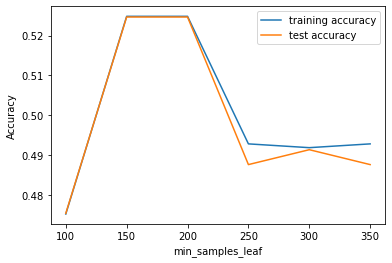

In [89]:
#plot accuracies with min_samples_split
plt.figure()

#training accuracy
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")

#test accuracy
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")

#labels
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")


plt.legend()
plt.show()

In [90]:
print(rf_hyper.best_score_)
print(rf_hyper.best_params_)

0.5246598639455782
{'min_samples_leaf': 150}


In [91]:
#hyperparameter model
rf_final = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              n_estimators=100)

#fit
rf_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)

In [92]:
#prediction
y_pred_default = rf_final.predict(X_test)

#classification report
print(classification_report(y_test,y_pred_default))

#confusion matrix
print(confusion_matrix(y_test,y_pred_default))

#accuracy
print('accuracy_score: ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.89      0.74      0.81        34

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

[[24  3]
 [ 9 25]]
accuracy_score:  0.8032786885245902


In [93]:
#Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[24,  3],
       [ 9, 25]], dtype=int64)

In [94]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,y_pred_default))

#sensitivity
print('Sensitivity: ', TP / float(TP+FN))

#specificity
print('Specificity: ',TN / float(TN+FP))

Accuracy Score:  0.8032786885245902
Sensitivity:  0.7352941176470589
Specificity:  0.8888888888888888


SUMMARY OF TWO MODELS :

    1. Logistic Regression --
    
        Sensitivity:  0.7941176470588235
        Specificity:  0.8888888888888888
        AUC:  0.92
        
    2. Random Forest -- 
    
        Accuracy Score:  0.819672131147541
        Sensitivity:  0.7941176470588235
        Specificity:  0.8518518518518519

##### MODEL EVALUATION

###### Choosing Best Model -- LOGISTIC REGRESSION

In [95]:
#number of features consider to split each node
max_features = int(round(np.sqrt(X_train.shape[1])))
print(max_features)

4


In [96]:
#creating PCA class
pca = PCA(svd_solver='randomized', random_state=42)

#pca fitting on train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [97]:
#getting pca components
pc = pca.components_

#listing all the columns of X_train together
col_names = list(X_train.columns)

#finding top 10 pca components
pca_features = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],
                             'PC6':pc[5],'PC7':pc[6],'PC8':pc[7],'PC9':pc[8],'PC10':pc[9], 
                            'Features':col_names})

#pca_features.head(10)

In [98]:
#creating pipeline
PCA_VARS = 18
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [99]:
#train data

#fit pipeline model
pipeline.fit(X_train, y_train)

#checking score on train data
pipeline.score(X_train, y_train)

0.8553719008264463

###### Test data evaluation

In [100]:
#churn prediction on test data
y_pred = pipeline.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

#Let's see the sensitivity
print('\nSensitivity: ', TP / float(TP+FN))

#Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

#area under curve (AUC)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("\n AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[24  3]
 [ 7 27]]

Sensitivity:  0.7941176470588235
Specificity:  0.8888888888888888

 AUC:  0.92


###### Hyperparameter Tuning

In [101]:
#identifying class imbalance
y_train.value_counts()/y_train.shape

1    0.541322
0    0.458678
Name: output, dtype: float64

In [102]:
#pca = PCA()

#logistic Regression with class_weight parameter
logistic = LogisticRegression(class_weight='balanced')

#creating pipeline
steps = [("scaler", StandardScaler()), ("pca", pca),("logistic", logistic)]

#pipeline
pca_logistic = Pipeline(steps)

#hyperparameter
params = {'pca__n_components': [14, 4], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

#create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [103]:
#fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca',
                                        PCA(random_state=42,
                                            svd_solver='randomized')),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [14, 4]},
             scoring='roc_auc', verbose=1)

In [104]:
#print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8960738938999808
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 14}


In [105]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

#Let's see the sensitivity
print('\nSensitivity: ', TP / float(TP+FN))

#Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("\nAUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[24  3]
 [ 7 27]]

Sensitivity:  0.7941176470588235
Specificity:  0.8888888888888888

AUC:  0.92


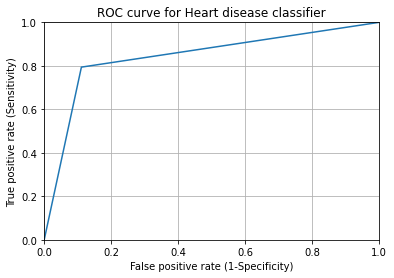

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

<AxesSubplot:>

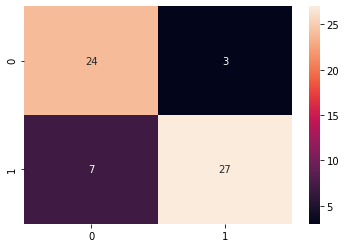

In [107]:
#heatmap of prediction
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

###### Saving the model

In [108]:
#library to save model
import joblib
  
# Save the model as a pickle in a file 
joblib.dump(model, 'models/saved_model.pkl') 

['models/saved_model.pkl']

In [109]:
# Load the model from the file 
saved_model = joblib.load('models/saved_model.pkl') 

# Use the loaded model to make predictions
response_model = saved_model.predict(X_test)

#### Feature Importance

In [123]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model_1 = ExtraTreesClassifier(n_estimators=10)
model_1.fit(X_train, y_train)
imp = model_1.feature_importances_
print(imp)

[0.07028943 0.04909357 0.07307904 0.05522422 0.0190852  0.07107611
 0.09925712 0.06763895 0.04194747 0.10540194 0.01692606 0.04675808
 0.03750618 0.01430692 0.01884668 0.07979567 0.12102388 0.01274347]


In [126]:
#zipping columns and feature_importance
colnames = X_train.columns.values
imp,colnames = zip(*sorted(zip(imp,colnames)))

In [127]:
imp,colnames

((0.012743469505043728,
  0.014306915784831755,
  0.01692606420057857,
  0.018846683006302066,
  0.01908519715772754,
  0.037506175406340755,
  0.04194746862613005,
  0.046758084024981356,
  0.04909356635549602,
  0.05522422075170533,
  0.06763894962521683,
  0.07028943378951628,
  0.07107611375024524,
  0.07307904275021036,
  0.07979567427807256,
  0.09925712260589561,
  0.10540194254484801,
  0.12102387583685809),
 ('age',
  'sex',
  'trtbps',
  'chol',
  'fbs',
  'thalachh',
  'exng',
  'oldpeak',
  'slp',
  'caa',
  'cp_atypical angina',
  'cp_non-anginal pain',
  'cp_typical angina',
  'restecg_left ventricular hypertrophy',
  'restecg_normal',
  'thall_normal',
  'thall_reversable defect',
  'thall_fixed defect'))

In [128]:
top_features = ['thall_fixed defect', 'thall_reversable defect', 'thall_normal', 'restecg_normal',
                'restecg_left ventricular hypertrophy', 'cp_typical angina', 'cp_non-anginal pain', 
                'cp_atypical angina', 'caa', 'slp']

X_train = X_train[top_features]
X_test = X_test[top_features]

<AxesSubplot:>

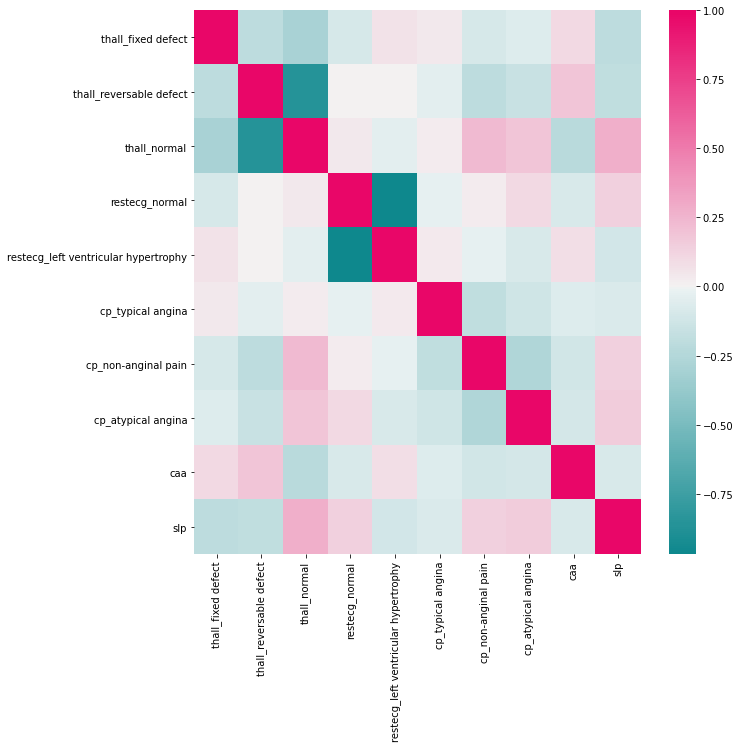

In [129]:
# plot feature correlation
import seaborn as sns

plt.rcParams["figure.figsize"] =(10,10)

mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [130]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
logis_model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
logis_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [131]:
# print best hyperparameters
print("Best AUC: ", logis_model.best_score_)
print("Best hyperparameters: ", logis_model.best_params_)

Best AUC:  0.8825954641172034
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2'}


#### Save the model

In [132]:
# Save the model as a pickle in a file 
joblib.dump(logis_model, 'models/logis_model.pkl') 

['models/logis_model.pkl']

#### Load the model

In [133]:
# Load the model from the file 
logis_pickle_model = joblib.load('models/logis_model.pkl') 

# Use the loaded model to make predictions
response_logis_model = logis_pickle_model.predict(X_test)

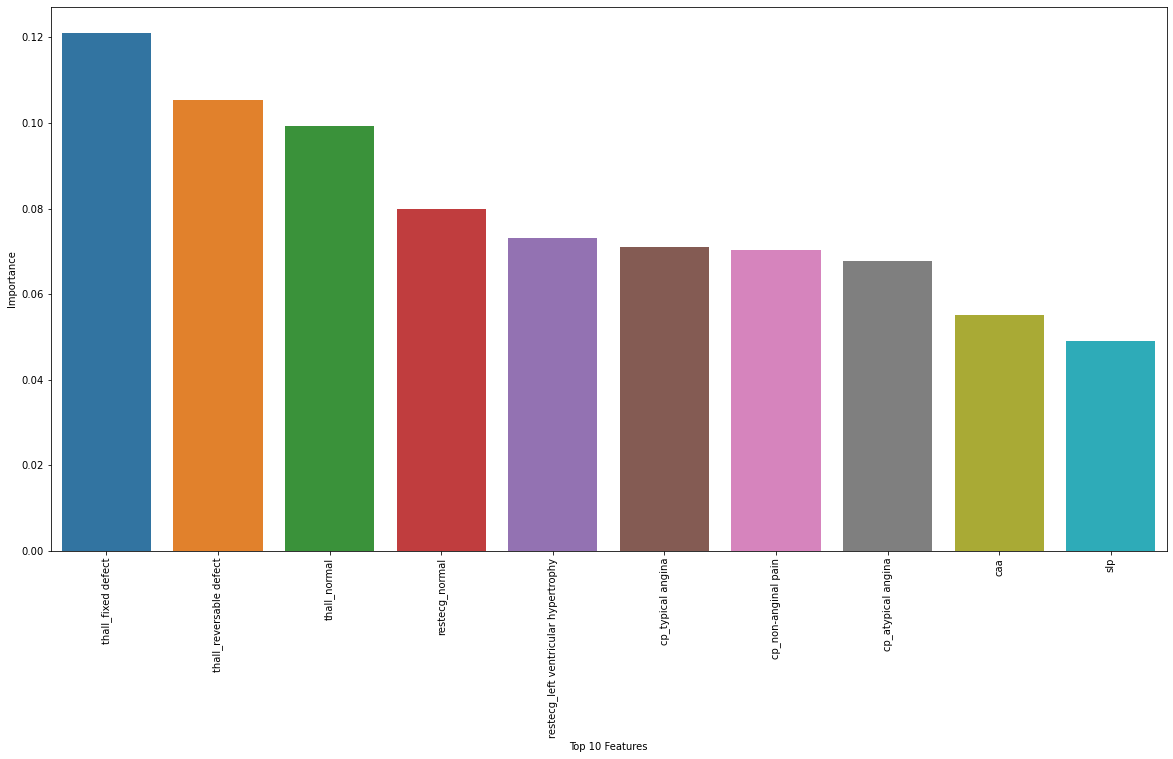

In [135]:
#dataframe for colnames and imp
df = pd.DataFrame({"Variable":colnames, "importance":imp})
df1 = df.sort_values(by="importance",axis=0,ascending=False)
df1 = df1.reset_index(drop=True)

#plot features top10
plt.figure(figsize=(20, 10))

#barplot
gr = sns.barplot(x='Variable', y= 'importance', data=df1[0:10])

#labels
gr.set(xlabel = 'Top 10 Features', ylabel = 'Importance')

plt.xticks(rotation=90)
plt.show()

##### RECOMMENDATIONS

For model building, we can use logistic regression for predicting the unseen data, as this model produces 92% accuracy, that is best among the other model predicted.

###### CONCLUSION

1. Numeric Variables - No outliers were found!
2. In the count of target showed up that we have more chance of heart attack details.
3. Age from 40-60 years have the high chance of heart attack.
4. Male gender has more chance of heart attack compared to female ones.
5. High Blood Pressure, High Cholestrol and High Heart Rate leads to high chance of heart attack.
6. Highly Correlated factors in this dataset are :
    
    ** Age and trtbps (blood pressure rate)
    
    ** Age and chol (cholestrol level)

###### ---------------------------------------------------------------------------- by Sakshi Maharana ----------------------------------------------------------------------------